In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

import cv2 as cv
import numpy as np

image_path = 'images/lab7.jpg'
pattern_path = 'images/pattern.jpg'

In [2]:
def plot_rgb(cv_image):
    plt.imshow(cv.cvtColor(cv_image, cv.COLOR_BGR2RGB))

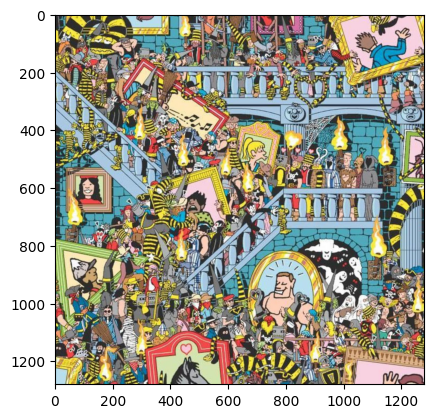

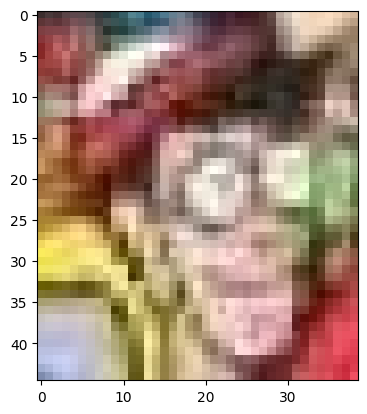

In [3]:
image = cv.imread(image_path)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

pattern = np.rot90(cv.imread(pattern_path))
pattern_gray = cv.cvtColor(pattern, cv.COLOR_BGR2GRAY)

plt.figure()
plot_rgb(image)
plt.figure()
plot_rgb(pattern)

<Axes: >

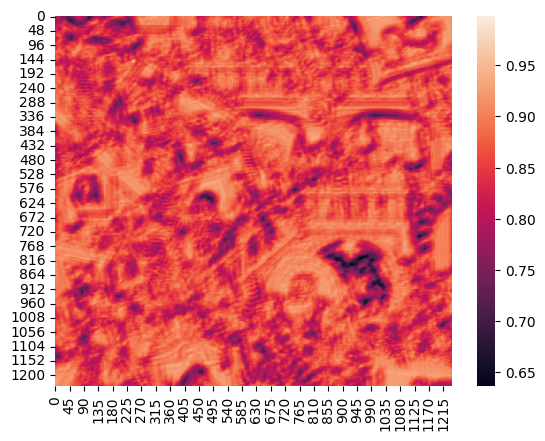

In [4]:
simple_match = cv.matchTemplate(image_gray, pattern_gray, cv.TM_CCORR_NORMED)

sns.heatmap(simple_match)

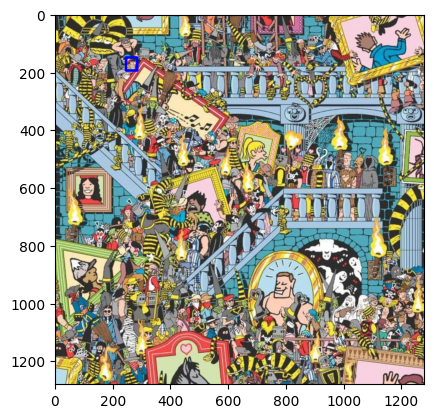

In [5]:
i, j = np.unravel_index(simple_match.argmax(), simple_match.shape)

w, h = pattern.shape[:-1]
plot_image = image.copy()

cv.rectangle(plot_image, (j, i), (j + h, i + w), (255, 0, 0), 8)

plot_rgb(plot_image)

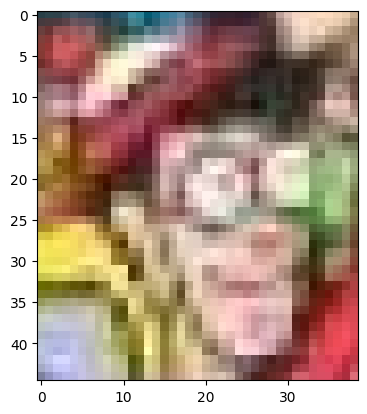

In [6]:
i, j = np.unravel_index(simple_match.argmax(), simple_match.shape)

plot_rgb(image[i:i+w,j:j+h])

In [7]:
f'Pattern on image found at position {i} {j}'

'Pattern on image found at position 150 245'